# Hello World

Importing libraries

In [81]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Statistics
import scipy.stats as stats

# Machine learning and preprocessing (optional but common)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix


Loading data

In [82]:
sales_df = pd.read_csv('./sales.csv')

Studying data

In [83]:
sales_df.head()         # View first few rows
sales_df.tail()         # View last few rows
sales_df.shape          # (rows, columns)
sales_df.columns        # Column names
sales_df.info()         # Data types and non-null counts
sales_df.describe()     # Summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


Preprocessing data

In [84]:
#Understanding the data
#First of all, we'll drop the first column (unnamed), as it's not relevant:
sales_df = sales_df.drop('Unnamed: 0',axis=1)

In [85]:
sales_df.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882


In [86]:
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Extract year, month, and day into separate columns
sales_df['year'] = sales_df['date'].dt.year
sales_df['month'] = sales_df['date'].dt.month
sales_df['day'] = sales_df['date'].dt.day
sales_df

#now drop original date column:
sales_df = sales_df.drop('date',axis=1)
sales_df

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day
0,366,4,517,1,0,0,0,4422,2013,4,18
1,394,6,694,1,0,0,0,8297,2015,4,11
2,807,4,970,1,1,0,0,9729,2013,8,29
3,802,2,473,1,1,0,0,6513,2013,5,28
4,726,4,1068,1,1,0,0,10882,2013,10,10
...,...,...,...,...,...,...,...,...,...,...,...
640835,409,6,483,1,0,0,0,4553,2013,10,26
640836,97,1,987,1,1,0,0,12307,2014,4,14
640837,987,1,925,1,0,0,0,6800,2014,7,7
640838,1084,4,725,1,0,0,0,5344,2014,6,12


In [87]:
# Filter rows where 'open' is 0
sales_when_closed = sales_df[sales_df['open'] == 0]['sales']

# Display the result
print(sales_when_closed)

sales_when_closed.value_counts()

6         0
10        0
18        0
34        0
35        0
         ..
640807    0
640812    0
640814    0
640834    0
640839    0
Name: sales, Length: 108824, dtype: int64


sales
0    108824
Name: count, dtype: int64

In [88]:
#When it comes to 'open' column, we would like to remove the rows where value is 0, as it means that the store was closed. Therefore, sales will be 0. 

days_open_sales_df = sales_df[sales_df['open'] != 0]

#drop 'open' column, as we've already filtered the results: 
days_open_sales_df.drop('open', axis=1, inplace=True)
days_open_sales_df.shape

C:\Users\jefit\AppData\Local\Temp\ipykernel_7852\3436553232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_open_sales_df.drop('open', axis=1, inplace=True)


(532016, 10)

In [89]:
#let's work on 'state holiday' column:
# We can see that dtype for state holiday column is object. However, the values are either 0 or 1 (boolean variable):
days_open_sales_df['state_holiday'].value_counts()

mapping = {'0': 0, 'a': 1, 'b': 1, 'c': 1}
days_open_sales_df['state_holiday'] = days_open_sales_df['state_holiday'].map(mapping)

days_open_sales_df['state_holiday'].value_counts()

C:\Users\jefit\AppData\Local\Temp\ipykernel_7852\590106932.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_open_sales_df['state_holiday'] = days_open_sales_df['state_holiday'].map(mapping)


state_holiday
0    531437
1       579
Name: count, dtype: int64

In [90]:
#Check value counts for 'school_holiday' column:

days_open_sales_df['school_holiday'].value_counts()

school_holiday
0    429215
1    102801
Name: count, dtype: int64

In [91]:
#Check null values:
days_open_sales_df.isnull().sum()

store_ID               0
day_of_week            0
nb_customers_on_day    0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
year                   0
month                  0
day                    0
dtype: int64

<Axes: >

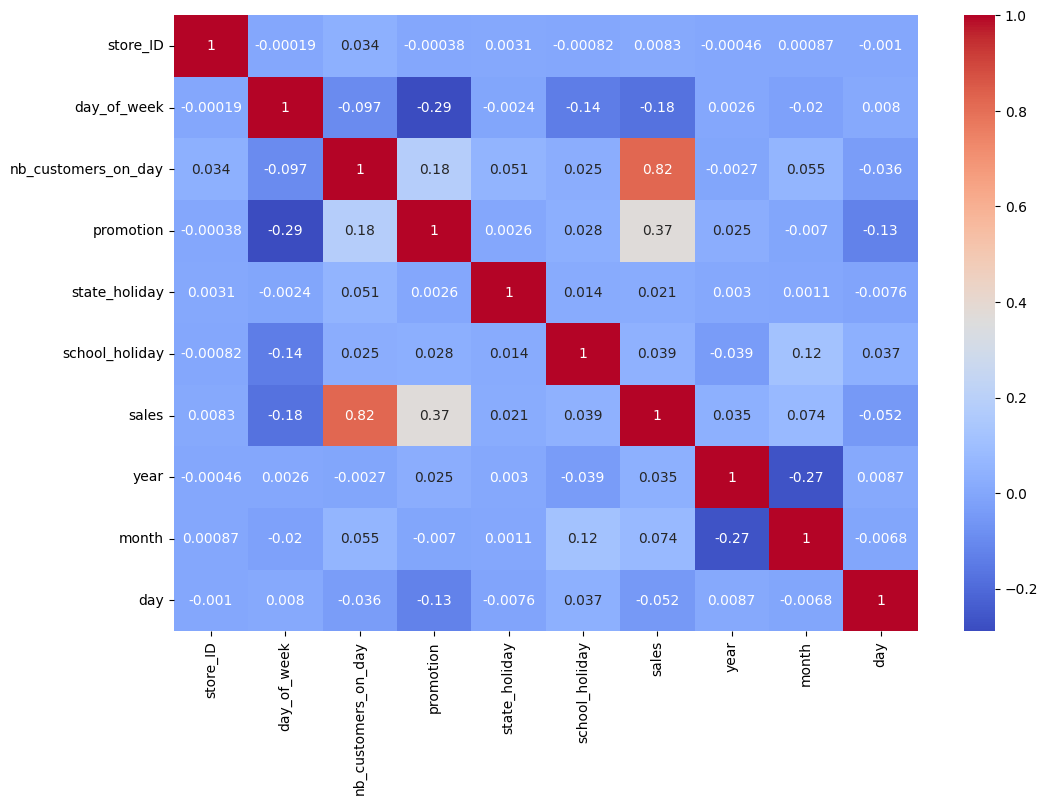

In [92]:
#check colinearity between variables:
plt.figure(figsize=(12, 8))
corr = days_open_sales_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [93]:
# In the above graph, we cannot see any strong correlation between two variables. The only remarkable one is nb_customers_on_day and sales volume, which is expected. 
# However, as the correlation between thee two is below 0.85, we will leave both for now.

In [94]:
days_open_sales_df.describe()

print(days_open_sales_df['nb_customers_on_day'].nlargest(10).tolist())
print(days_open_sales_df['nb_customers_on_day'].nsmallest(10).tolist())

print(days_open_sales_df['sales'].nlargest(10).tolist())
print(days_open_sales_df['sales'].nsmallest(10).tolist())



[5458, 5387, 5297, 5192, 5152, 5145, 5132, 5112, 5069, 5063]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[41551, 38722, 38484, 38367, 38037, 38025, 37403, 37376, 37122, 36227]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


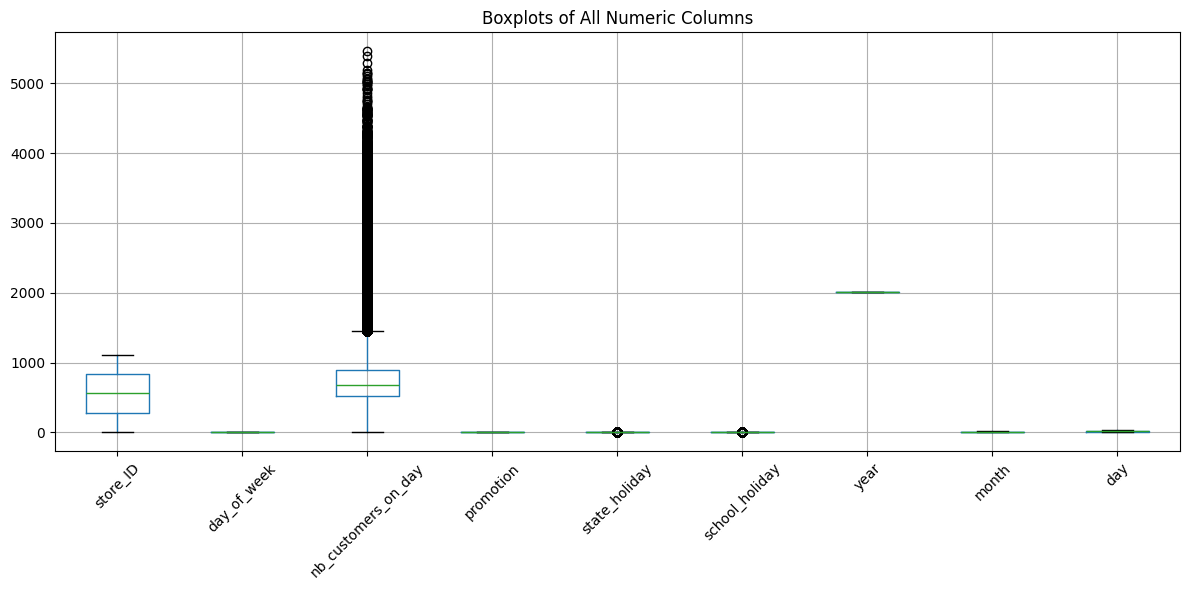

In [95]:
import matplotlib.pyplot as plt

# Create boxplots for all numeric columns
days_open_sales_df.drop('sales',axis=1).boxplot(figsize=(12, 6))
plt.title("Boxplots of All Numeric Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

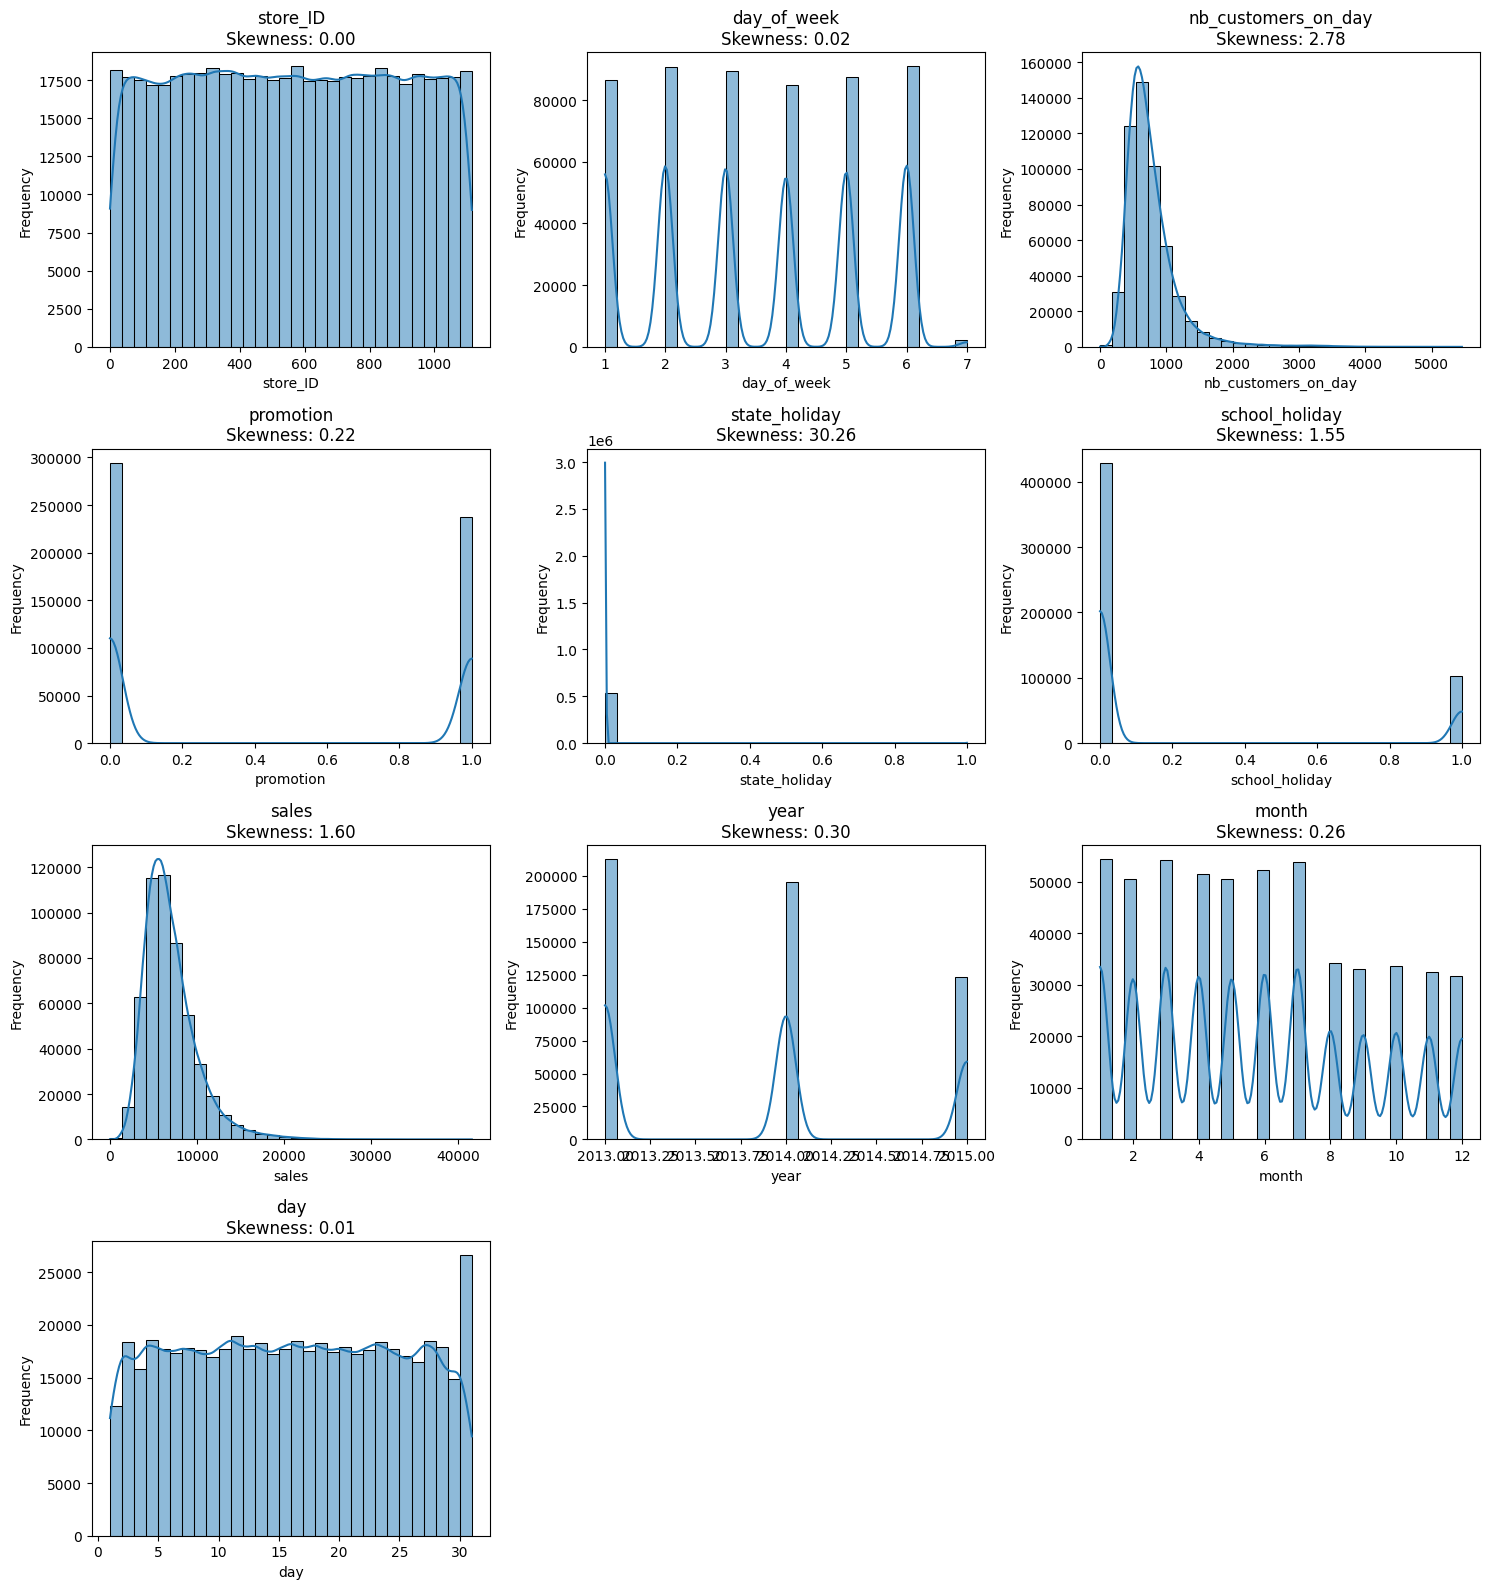

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Select numeric columns
numeric_cols = days_open_sales_df.select_dtypes(include='number').columns

# Set up the plot grid
n_cols = 3  # Number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(days_open_sales_df[col], kde=True, bins=30)
    plt.title(f'{col}\nSkewness: {skew(days_open_sales_df[col].dropna()):.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [97]:
#Based on the above graph, we can observe that nb_of_customers is rightly skewed. To fix this, we will calculate the log values of the column. 

days_open_sales_df['nb_customers_on_day'] = np.log1p(days_open_sales_df['nb_customers_on_day'])

days_open_sales_df.head()

from sklearn.model_selection import train_test_split

# Sort by date columns first
days_open_sales_df = days_open_sales_df.sort_values(by=['year', 'month', 'day']).reset_index(drop=True)

# Then split
X = days_open_sales_df.drop('sales', axis=1)
y = days_open_sales_df['sales']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\jefit\AppData\Local\Temp\ipykernel_7852\2406392902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_open_sales_df['nb_customers_on_day'] = np.log1p(days_open_sales_df['nb_customers_on_day'])


In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

binary_cols = ['promotion', 'state_holiday', 'school_holiday']  # example binary columns
continuous_cols = ['nb_customers_on_day', 'store_ID', 'day_of_week', 'day', 'month', 'year']  # example continuous columns

# 1. Scale continuous features
scaler = StandardScaler()
X_scaled_cont = scaler.fit_transform(X[continuous_cols])
X_scaled_cont = pd.DataFrame(X_scaled_cont, columns=continuous_cols, index=X.index)

# 2. Combine with binary features
X_model = pd.concat([X_scaled_cont, X[binary_cols]], axis=1)

# 3. Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# 4. Define models
from sklearn.pipeline import make_pipeline

models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Decision Tree': make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=42)),
    'Random Forest': make_pipeline(StandardScaler(), RandomForestRegressor(max_depth=8, random_state=42)),
    'KNN': make_pipeline(StandardScaler(), KNeighborsRegressor())
}

# 5. Evaluate each model using TimeSeriesSplit cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    print(f"{name} TimeSeriesSplit R² (mean over 5 splits): {np.mean(scores):.4f}")



Linear Regression TimeSeriesSplit R² (mean over 5 splits): 0.7015
Decision Tree TimeSeriesSplit R² (mean over 5 splits): 0.7674
Random Forest TimeSeriesSplit R² (mean over 5 splits): 0.7773
KNN TimeSeriesSplit R² (mean over 5 splits): 0.7046


Linear Regression TimeSeriesSplit R² (mean over 5 splits): 0.7015
Decision Tree TimeSeriesSplit R² (mean over 5 splits): 0.7674
Random Forest TimeSeriesSplit R² (mean over 5 splits): 0.7773
KNN TimeSeriesSplit R² (mean over 5 splits): 0.7046


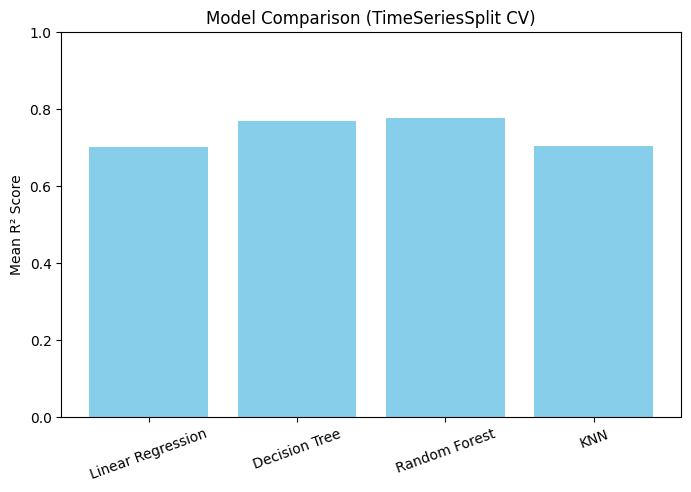

In [99]:
import matplotlib.pyplot as plt

# Store mean R² scores for each model
mean_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    mean_scores[name] = np.mean(scores)
    print(f"{name} TimeSeriesSplit R² (mean over 5 splits): {mean_scores[name]:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(mean_scores.keys(), mean_scores.values(), color='skyblue')
plt.ylabel('Mean R² Score')
plt.title('Model Comparison (TimeSeriesSplit CV)')
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.show()

In [ ]:
'DecisionTree': {'max_depth': [3, 5, 10, None}

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Define the parameter grid for Decision Tree
param_grid = {
    'decisiontreeregressor__max_depth': [3, 5, 10, None]
}

# Create a pipeline with scaling and Decision Tree
pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=42))
tscv = TimeSeriesSplit(n_splits=5)

# GridSearchCV with time series split and all CPU cores
grid = GridSearchCV(pipe, param_grid, cv=tscv, scoring='r2', n_jobs=-1)
grid.fit(X, y)

print("Best R²:", grid.best_score_)
print("Best params:", grid.best_params_)

Best R²: 0.7799124340742645
Best params: {'decisiontreeregressor__max_depth': 10}


In [102]:
param_grid = {
    'randomforestregressor__n_estimators': [50],
    'randomforestregressor__max_depth': [10]
}

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
tscv = TimeSeriesSplit(n_splits=5)

grid = GridSearchCV(pipe, param_grid, cv=tscv, scoring='r2')
grid.fit(X, y)
print("Best R²:", grid.best_score_)
print("Best params:", grid.best_params_)

Best R²: 0.7942831888957784
Best params: {'randomforestregressor__max_depth': 10, 'randomforestregressor__n_estimators': 50}


In [ ]:
# 1. Load and preprocess REAL_DATA.csv
real_df = pd.read_csv('./REAL_DATA.csv')

# Apply the same preprocessing steps as your training data
# Example (adapt as needed for your actual pipeline):
real_df = real_df.drop('Unnamed: 0', axis=1, errors='ignore')
real_df['date'] = pd.to_datetime(real_df['date'],format="%d/%m/%Y")
real_df['year'] = real_df['date'].dt.year
real_df['month'] = real_df['date'].dt.month
real_df['day'] = real_df['date'].dt.day
real_df = real_df.drop('date', axis=1)
#real_df = real_df[real_df['open'] == 0]
real_df['state_holiday'] = real_df['state_holiday'].map({'0': 0, 'a': 1, 'b': 1, 'c': 1})
real_df['nb_customers_on_day'] = np.log1p(real_df['nb_customers_on_day'])

# Select the same features as in training
X_real = real_df[X.columns]  # Ensure columns match training features

# 2. Predict using the best Random Forest pipeline from GridSearchCV
best_rf = grid.best_estimator_  # grid is your GridSearchCV object for Random Forest

sales_pred = best_rf.predict(X_real)

# 3. (Optional) Add predictions to your DataFrame and save
real_df['predicted_sales'] = sales_pred
real_df.loc[real_df['open'] == 0, 'predicted_sales'] = 0
real_df.to_csv('G3.csv', index=False)

# Show first few predictions
print(real_df[['predicted_sales']])



       predicted_sales
0             0.000000
1             0.000000
2          6830.539427
3          6701.234647
4          6200.925543
...                ...
71200         0.000000
71201         0.000000
71202      5456.227939
71203      6599.792261
71204      7790.911921

[71205 rows x 1 columns]


Linear Regression TimeSeriesSplit R² (mean over 5 splits): 0.9427
Decision Tree TimeSeriesSplit R² (mean over 5 splits): 0.9883
Random Forest TimeSeriesSplit R² (mean over 5 splits): 0.9855
KNN TimeSeriesSplit R² (mean over 5 splits): 0.6598


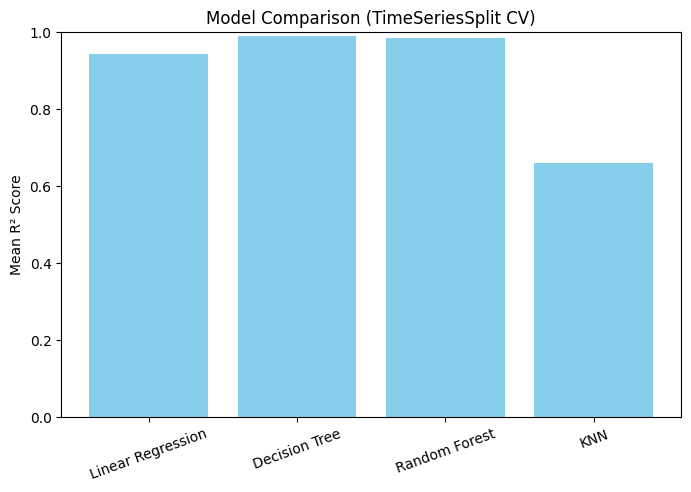

In [127]:
real_df = real_df.sort_values(by=['year', 'month', 'day']).reset_index(drop=True)

X_tests = real_df.drop('predicted_sales', axis=1)

y_tests = real_df['predicted_sales']

mean_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_tests, y_tests, cv=tscv, scoring='r2')
    mean_scores[name] = np.mean(scores)
    print(f"{name} TimeSeriesSplit R² (mean over 5 splits): {mean_scores[name]:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(mean_scores.keys(), mean_scores.values(), color='skyblue')
plt.ylabel('Mean R² Score')
plt.title('Model Comparison (TimeSeriesSplit CV)')
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.show()

Here’s a step-by-step explanation of our workflow and the final result:

1. Importing Libraries -->
We started by importing essential libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), statistics, and machine learning (scikit-learn).

2. Loading and Exploring the Data:
We loaded the sales data from sales.csv and explored it using .head(), .tail(), .shape, .columns, .info(), and .describe() to understand its structure and contents.

3. Preprocessing the Data -->
We dropped unnecessary columns, such as the unnamed index column.
We converted the date column to datetime format and extracted year, month, and day as new columns, then dropped the original date.
We filtered out rows where the store was closed (open == 0) and dropped the open column.
We encoded categorical variables, mapping state_holiday values to binary.
We checked for nulls and collinearity using heatmaps and value counts.
We applied a log transformation to nb_customers_on_day to reduce skewness.
4. Feature Engineering and Splitting -->
We sorted the data chronologically and split it into features (X) and target (y).

5. Scaling and Model Preparation -->
We scaled continuous features using StandardScaler and combined them with binary features. We defined several regression models—Linear Regression, Decision Tree, Random Forest, and KNN—all within pipelines that include scaling.

6. Model Evaluation -->
We used TimeSeriesSplit cross-validation to evaluate each model’s R² score, ensuring the evaluation respected the time series nature of the data. We also visualized model performance with a bar plot.

7. Hyperparameter Tuning -->
We applied GridSearchCV with TimeSeriesSplit to tune hyperparameters for both Decision Tree and Random Forest regressors, using all CPU cores for efficiency (n_jobs=-1). We identified the best model parameters and R² score.

8. Predicting on New Data -->
We loaded and preprocessed REAL_DATA.csv using the same steps as the training data (date parsing, feature engineering, encoding, log transformation). We ensured the feature columns matched the training set. We used the best Random Forest model from GridSearchCV to predict sales for the new data. We set predicted_sales to 0 for rows where the store was closed (open == 0) and saved the predictions to G3.csv.

9. Final Result -->
The final output is a CSV file (G3.csv) containing all the original features from REAL_DATA.csv plus a predicted_sales column. All predictions for closed days are set to 0. We evaluated and visualized the model’s performance, and our workflow is now ready for further analysis or deployment.


Conclusion: 
We built a robust time series regression pipeline, carefully preprocessed our data, tuned our models, and generated sales predictions for new data, ensuring business logic (no sales when closed) was respected in the final output.

